<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_Compraventa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga del conjunto de datos


Cargamos en un dataframe el dataset del paro en la ciudad de Barcelona

In [2]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [3]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [4]:
# Directorio del precio de compraventa
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Precio de compraventa de viviendas registradas de la ciudad de Barcelona/Trimestral'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [5]:
# Mostramos las primeras filas del dataframe
print(df_final.head())

    Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri  \
0  2022          1               1  Ciutat Vella           1   
1  2022          1               1  Ciutat Vella           2   
2  2022          1               1  Ciutat Vella           3   
3  2022          1               1  Ciutat Vella           4   
4  2022          1               2      Eixample           5   

                               Nom_Barri   Preu_mitja_habitatge  Valor  
0                               el Raval  Total. Milers d'euros  226.1  
1                         el Barri Gòtic  Total. Milers d'euros  453.0  
2                         la Barceloneta  Total. Milers d'euros  215.4  
3  Sant Pere, Santa Caterina i la Ribera  Total. Milers d'euros  353.3  
4                          el Fort Pienc  Total. Milers d'euros  340.0  


# 2. EDA: Análisis Exploratorio de Datos

In [6]:
print('Cantidad de Filas y columnas:',df_final.shape)
print('Nombre columnas:',df_final.columns)

Cantidad de Filas y columnas: (17081, 8)
Nombre columnas: Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Preu_mitja_habitatge', 'Valor'],
      dtype='object')


In [7]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17081 entries, 0 to 17080
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Any                   17081 non-null  int64 
 1   Trimestre             17081 non-null  int64 
 2   Codi_Districte        17081 non-null  int64 
 3   Nom_Districte         17081 non-null  object
 4   Codi_Barri            17081 non-null  int64 
 5   Nom_Barri             17081 non-null  object
 6   Preu_mitja_habitatge  17081 non-null  object
 7   Valor                 13778 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


El dataset se compone de un total de 8 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Trimestre:** Timestre en el que se recogieron los datos
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Preu_mitja_habitatge:** Precio medio de la vivienda (miles de euros)
*   **Valor:** Valor del precio de la vivienda

El dataset tiene un total de 17081 filas y no tiene missing-values

En este punto, advertimos que la variable **Valor** tiene menos valores non-null (13778). Ademas no se considera númerica, por lo que vamos ha modificar el tipo de la variable


In [8]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17081 entries, 0 to 17080
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Any                   17081 non-null  int64 
 1   Trimestre             17081 non-null  int64 
 2   Codi_Districte        17081 non-null  int64 
 3   Nom_Districte         17081 non-null  object
 4   Codi_Barri            17081 non-null  int64 
 5   Nom_Barri             17081 non-null  object
 6   Preu_mitja_habitatge  17081 non-null  object
 7   Valor                 13778 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


In [9]:
# Para manejar errores de conversión utilizaremos 'errors='coerce''
df_final['Valor'] = pd.to_numeric(df_final['Valor'], errors='coerce')

# Convertimos la columna a tipo float
df_final['Valor'] = df_final['Valor'].astype(float)

# Verificamos el cambio de tipo de dato
print(df_final.dtypes)

Any                       int64
Trimestre                 int64
Codi_Districte            int64
Nom_Districte            object
Codi_Barri                int64
Nom_Barri                object
Preu_mitja_habitatge     object
Valor                   float64
dtype: object


In [10]:
# Analizamos las variables numericas
df_final.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Valor
count,17081.000000,17081.000000,17081.000000,17081.000000,12609.000000
mean,2018.384404,2.461507,6.246765,37.001464,1944.575280
std,2.815876,1.105896,2.788388,21.071673,1920.558605
min,2014.000000,1.000000,1.000000,1.000000,15.900000
25%,2016.000000,1.000000,4.000000,19.000000,258.900000
50%,2018.000000,2.000000,7.000000,37.000000,1055.200000
75%,2021.000000,3.000000,8.000000,55.000000,3460.900000
max,2023.000000,4.000000,10.000000,73.000000,18551.100000


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** es integra y contiene la información correcta.
*   **Trimestre:** es integra y contiene la información correcta.
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 10 distritos, y en cambio como valor maximo nos aparece 99.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 73 barrios, y en cambio como valor maximo nos aparece 99
*   **Valor** no se considera numerica, por lo que vamos ha analizar que ocurre


In [11]:
# Utiliza isna() o isnull() para encontrar los NaN
filas_con_nan = df_final[df_final.isna().any(axis=1)]

# Muestra las filas que contienen NaN
print("Filas con NaN:")
print(filas_con_nan)

Filas con NaN:
        Any  Trimestre  Codi_Districte   Nom_Districte  Codi_Barri  \
11     2022          1               3  Sants-Montjuïc          12   
41     2022          1               7  Horta-Guinardó          42   
46     2022          1               8      Nou Barris          47   
53     2022          1               8      Nou Barris          54   
55     2022          1               8      Nou Barris          56   
...     ...        ...             ...             ...         ...   
17049  2023          3               7  Horta-Guinardó          42   
17054  2023          3               8      Nou Barris          47   
17061  2023          3               8      Nou Barris          54   
17063  2023          3               8      Nou Barris          56   
17065  2023          3               9     Sant Andreu          58   

                        Nom_Barri      Preu_mitja_habitatge  Valor  
11     la Marina del Prat Vermell     Total. Milers d'euros    NaN  
41    

Se observan 4472 filas con valores perdidos. Tal como se describe en las observaciones del dataset, corresponde a barrios donde no se han producido un minimo de 2 compraventas

In [12]:
valores_unicos = df_final['Preu_mitja_habitatge'].unique()

# Ahora puedes imprimir los diferentes valores únicos
print("Diferentes valores de la variable:")
print(valores_unicos)

Diferentes valores de la variable:
["Total. Milers d'euros" "Nou. Milers d'euros" "Usat. Milers d'euros"
 'Total. Euros/m2 construït' 'Nou. Euros/m2 construït'
 'Usat. Euros/m2 construït']


In [13]:
# Filtrar el dataFrame por Total. Milers d'euros
df_total = df_final[(df_final['Preu_mitja_habitatge'] == "Total. Milers d'euros")]

# Modificamos nombre de la variable valor
df_total = df_total.rename(columns={'Valor': 'Compraventa_Total'})

# Modificamos nombre de la variable valor
df_total = df_total.drop(columns=['Preu_mitja_habitatge'])

df_total.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total
0,2022,1,1,Ciutat Vella,1,el Raval,226.1
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,453.0
2,2022,1,1,Ciutat Vella,3,la Barceloneta,215.4
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",353.3
4,2022,1,2,Eixample,5,el Fort Pienc,340.0


In [14]:
# Filtrar el dataFrame por Total. Euros/m2 construït
df_unitario = df_final[(df_final['Preu_mitja_habitatge'] == "Total. Euros/m2 construït")]

# Modificamos nombre de la variable valor
df_unitario = df_unitario.rename(columns={'Valor': 'Compraventa_Unitario'})

# Modificamos nombre de la variable valor
df_unitario = df_unitario.drop(columns=['Preu_mitja_habitatge'])

df_unitario.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario
219,2022,1,1,Ciutat Vella,1,el Raval,3203.0
220,2022,1,1,Ciutat Vella,2,el Barri Gòtic,4755.7
221,2022,1,1,Ciutat Vella,3,la Barceloneta,4489.8
222,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",4739.0
223,2022,1,2,Eixample,5,el Fort Pienc,4175.4


In [15]:
# Realizar la unión de los DataFrames por múltiples claves
df_filtrado = pd.merge(df_total, df_unitario)

# Mostrar el resultado del filtrado
df_filtrado.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total,Compraventa_Unitario
0,2022,1,1,Ciutat Vella,1,el Raval,226.1,3203.0
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,453.0,4755.7
2,2022,1,1,Ciutat Vella,3,la Barceloneta,215.4,4489.8
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",353.3,4739.0
4,2022,1,2,Eixample,5,el Fort Pienc,340.0,4175.4


# 3. Análisis de los datos

Requisitos a tener en cuenta antes de realizar el analisis de datos:
1.   La informacion de compraventa por Barrio, no es relevante para este TFM, por lo que se debera agrupar la información por distrito
2.   El objetivo del presente TFM es el valor de compraventa, indepedientepente de que sea obra nueva o segunda mano. POr lo que en procedimientos anteriores se ha descartado esa información.

In [16]:
# De acuerdo con el punto 1 obtenemos un dataframe sin las varriables de Codi_Barri y Nom_Barri
datosCompraventa=df_filtrado[['Any','Trimestre','Codi_Districte','Nom_Districte','Compraventa_Total','Compraventa_Unitario']]
datosCompraventa.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Compraventa_Total,Compraventa_Unitario
0,2022,1,1,Ciutat Vella,226.1,3203.0
1,2022,1,1,Ciutat Vella,453.0,4755.7
2,2022,1,1,Ciutat Vella,215.4,4489.8
3,2022,1,1,Ciutat Vella,353.3,4739.0
4,2022,1,2,Eixample,340.0,4175.4


In [17]:
# Agrupamos por Any, Mes, Codi_Districte y Nom_Districte
datosCompraventaAgrup = datosCompraventa.groupby(['Codi_Districte','Nom_Districte','Any','Trimestre'])

# Sumamos las personas de la variable Nombre
datosCompraventaAgrup=datosCompraventaAgrup[['Compraventa_Total','Compraventa_Unitario']].mean()

print("Primeras filas del DataFrame:")
datosCompraventaAgrup.head(12)

Primeras filas del DataFrame:


Compraventa_Total  \
Codi_Districte Nom_Districte Any  Trimestre                      
1              Ciutat Vella  2014 1                    258.675   
                                  2                    268.225   
                                  3                    283.100   
                                  4                    315.850   
                             2015 1                    258.675   
                                  2                    268.225   
                                  3                    283.100   
                                  4                    315.850   
                             2016 1                    258.675   
                                  2                    268.225   
                                  3                    283.100   
                                  4                    315.850   

                                             Compraventa_Unitario  
Codi_Districte Nom_Districte Any  Trimestre                        
1              Ciutat Vella  2014 1                      3718.075  
                                  2                      3624.250  
                                  3                      3577.025  
                                  4                      3980.500  
                             2015 1                      3718.075  
                                  2                      3624.250  
                                  3                      3577.025  
                                  4                      3980.500  
                             2016 1                      3718.075  
                                  2                      3624.250  
                                  3                      3577.025  
                                  4                      3980.500

In [18]:
# Reseteamos indices sobre el dataframe agrupado
datosCompraventaAgrup = datosCompraventaAgrup.reset_index()

In [19]:
datosCompraventaAgrup.head()

,Codi_Districte,Nom_Districte,Any,Trimestre,Compraventa_Total,Compraventa_Unitario
0,1,Ciutat Vella,2014,1,258.675,3718.075
1,1,Ciutat Vella,2014,2,268.225,3624.250
2,1,Ciutat Vella,2014,3,283.100,3577.025
3,1,Ciutat Vella,2014,4,315.850,3980.500
4,1,Ciutat Vella,2015,1,258.675,3718.075


## 3.1 Análisis estadistíco básico

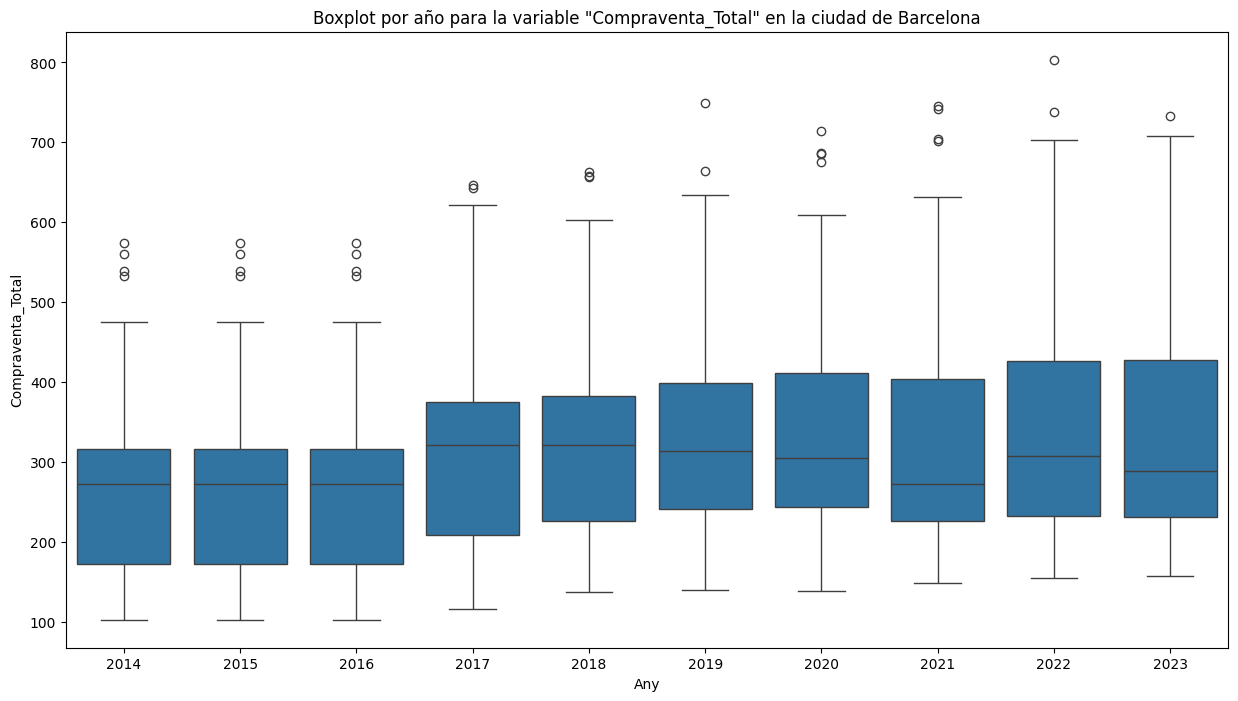

In [20]:
# Crear diagrama de caja para la variable continua Nombre
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Compraventa_Total', data=datosCompraventaAgrup)
plt.title('Boxplot por año para la variable "Compraventa_Total" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

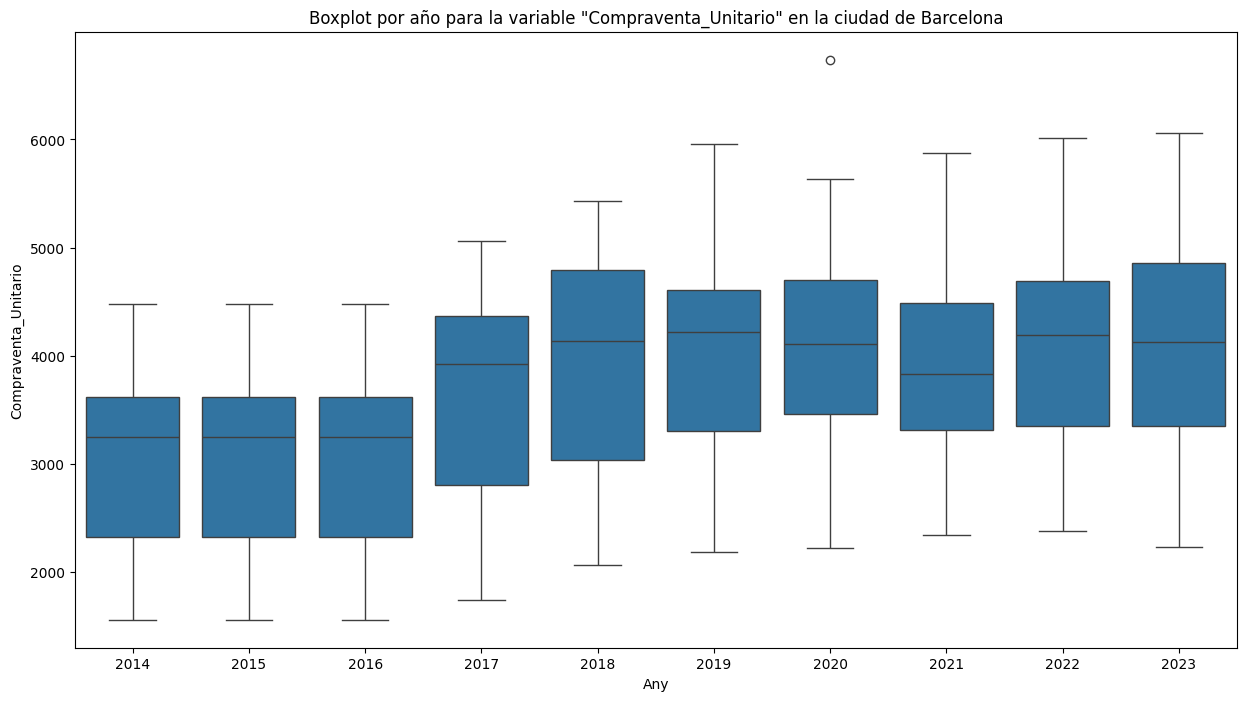

In [21]:
# Crear diagrama de caja para la variable continua Nombre
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Compraventa_Unitario', data=datosCompraventaAgrup)
plt.title('Boxplot por año para la variable "Compraventa_Unitario" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

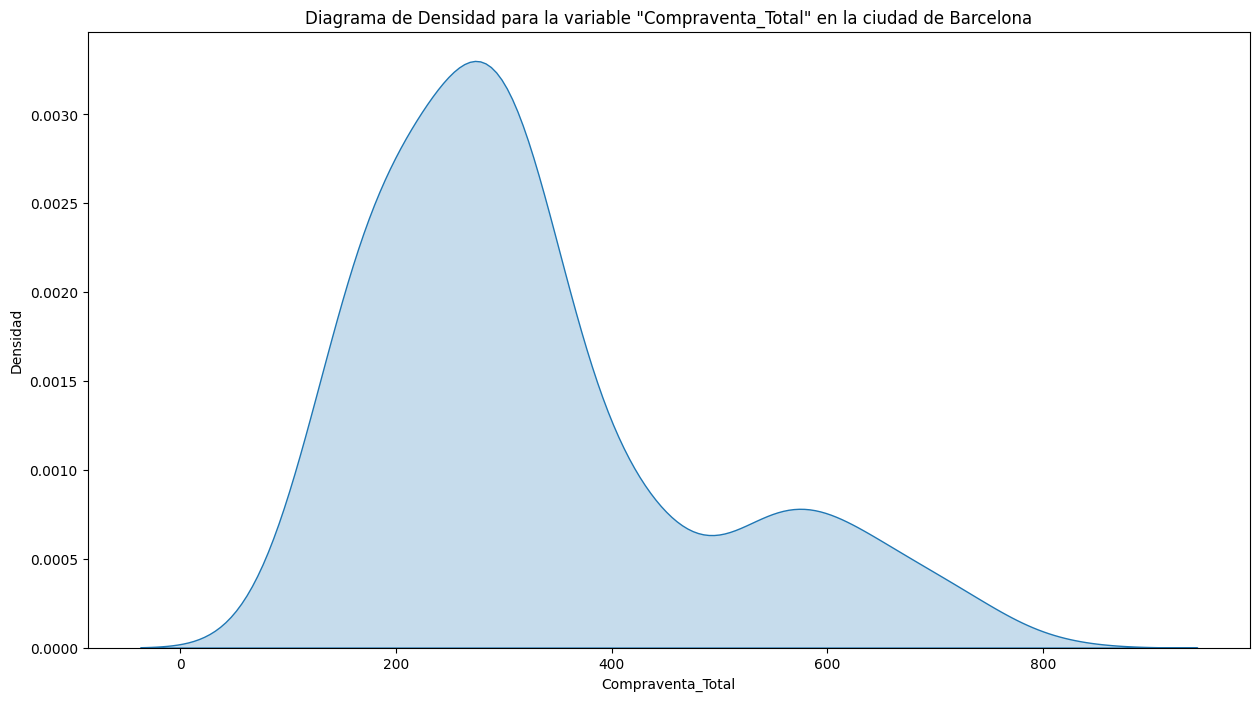

In [22]:
# Crear diagrama de densidad
plt.figure(figsize=(15, 8))
sns.kdeplot(datosCompraventaAgrup['Compraventa_Total'], fill=True)
plt.title('Diagrama de Densidad para la variable "Compraventa_Total" en la ciudad de Barcelona')
plt.xlabel('Compraventa_Total')
plt.ylabel('Densidad')

# Mostrar el diagrama de densidad
plt.show()

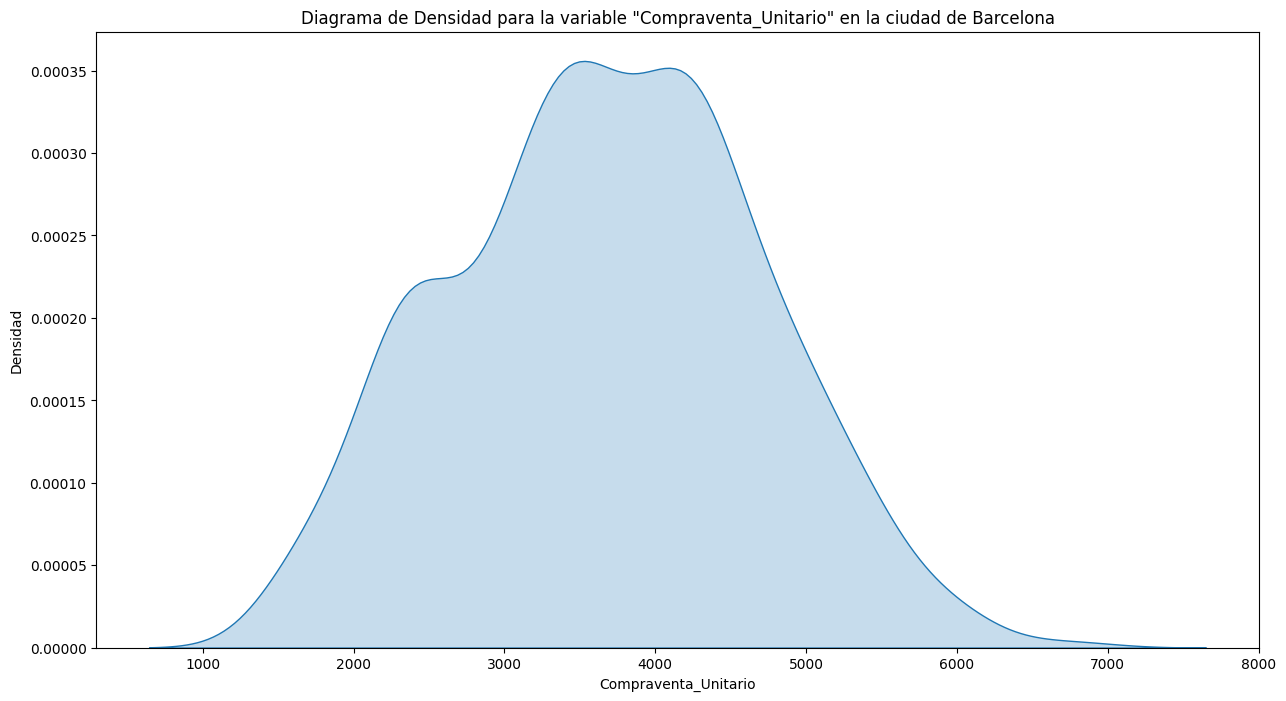

In [23]:
# Crear diagrama de densidad
plt.figure(figsize=(15, 8))
sns.kdeplot(datosCompraventaAgrup['Compraventa_Unitario'], fill=True)
plt.title('Diagrama de Densidad para la variable "Compraventa_Unitario" en la ciudad de Barcelona')
plt.xlabel('Compraventa_Unitario')
plt.ylabel('Densidad')

# Mostrar el diagrama de densidad
plt.show()

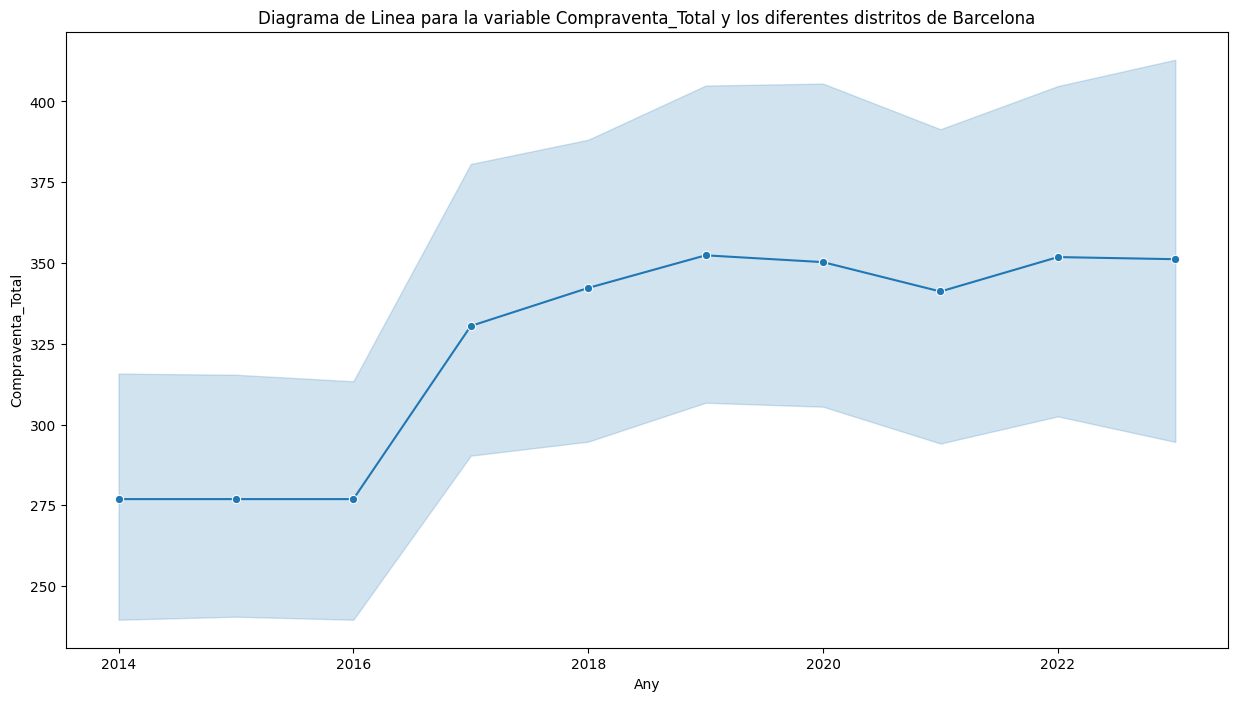

In [24]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosCompraventaAgrup, x='Any', y='Compraventa_Total', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Total y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Compraventa_Total')

plt.show()

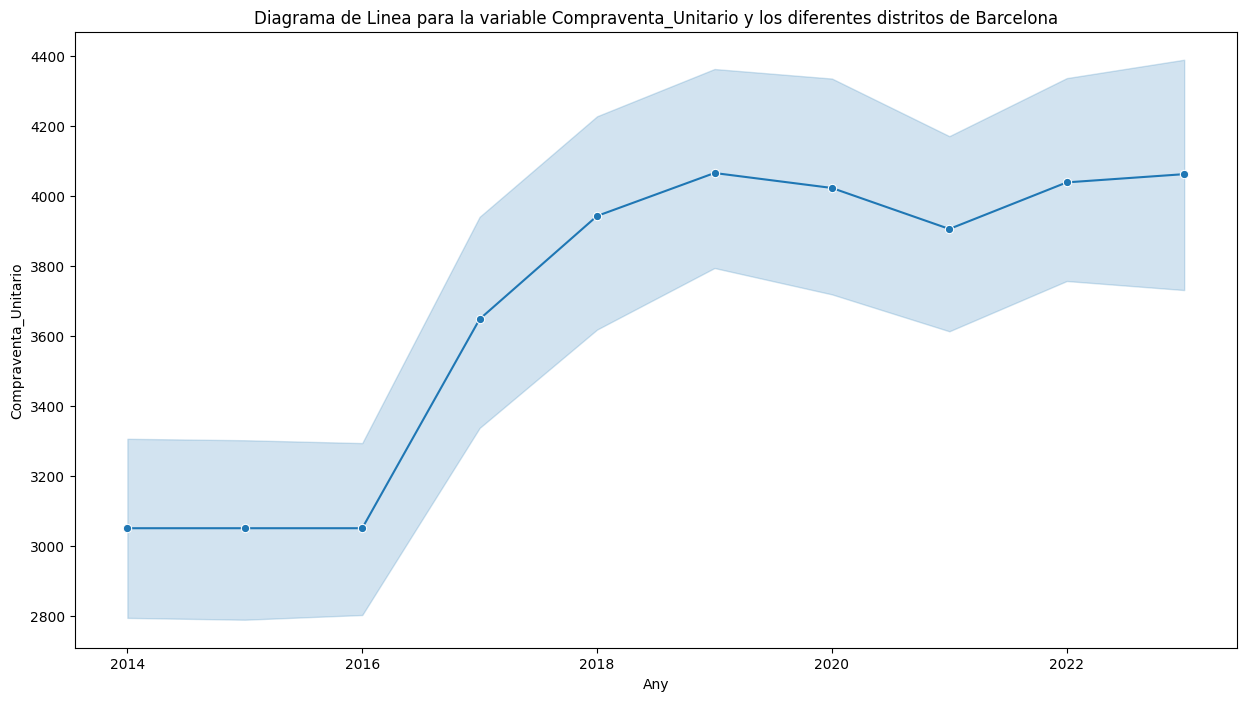

In [25]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosCompraventaAgrup, x='Any', y='Compraventa_Unitario', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Unitario y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Compraventa_Unitario')

plt.show()

In [26]:
# Obtener valores únicos de la variable categórica Nom Districte
distritos_ar = datosCompraventaAgrup['Nom_Districte'].unique()
distritos_ar

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [27]:
# Obtener valores únicos de la variable categórica Mes
any_ar = datosCompraventaAgrup['Any'].unique()
any_ar

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [28]:
# Obtener valores únicos de la variable categórica Mes
trimestre_ar = datosCompraventaAgrup['Trimestre'].unique()
trimestre_ar

array([1, 2, 3, 4])

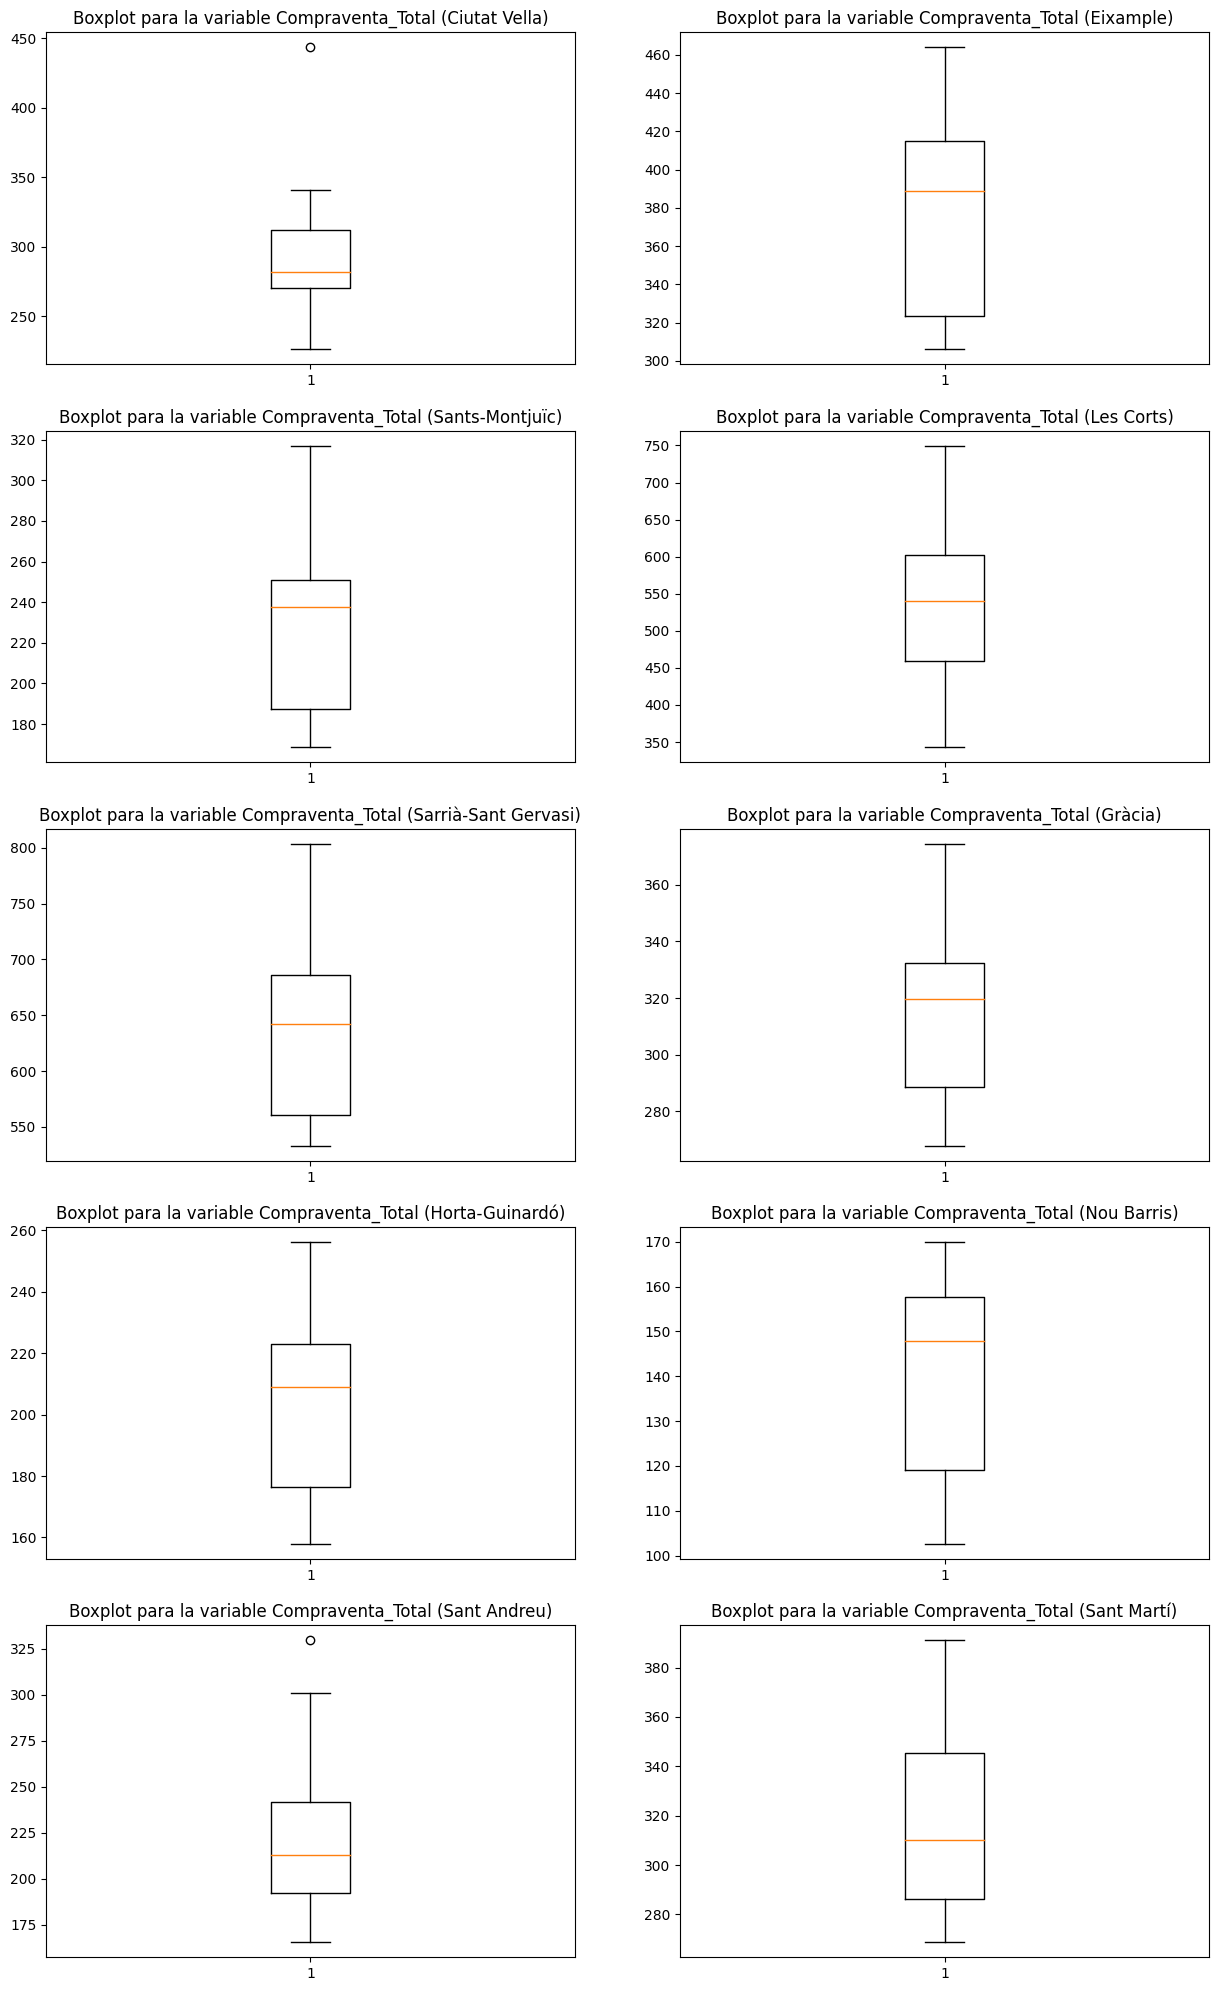

In [29]:
# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for district in distritos_ar:
    subset = datosCompraventaAgrup[datosCompraventaAgrup['Nom_Districte'] == district]  # Filtrar datos para la categoría actual
    axs[x, y].boxplot(data=subset, x='Compraventa_Total')# Graficar los valores de la variable continua
    # Configuraciones adicionales
    axs[x, y].set_title('Boxplot para la variable Compraventa_Total (' + district +')' )
    if y==0:
      y=1
    else:
      y=0
      x=x+1

plt.show()

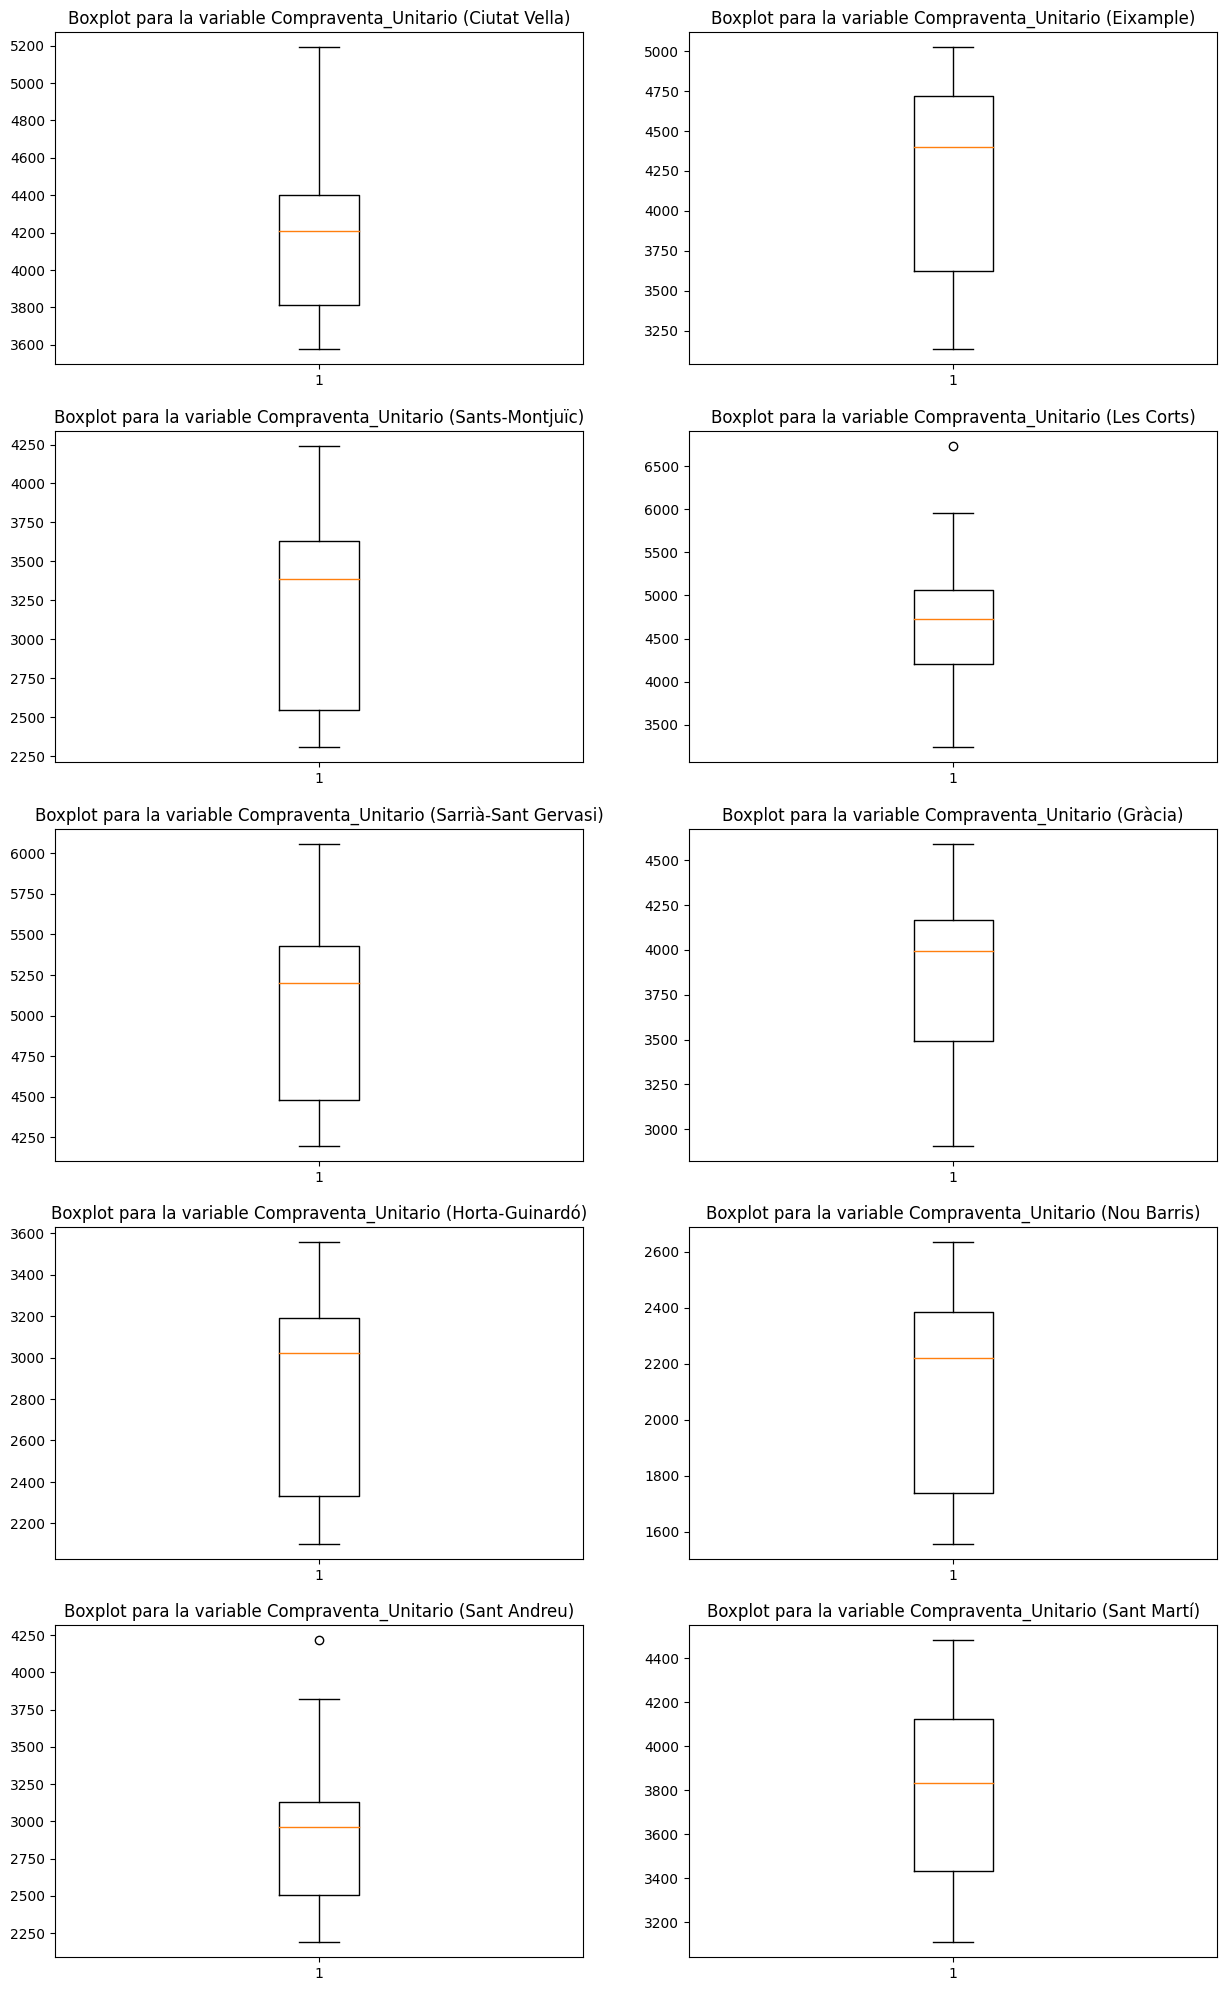

In [30]:
# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for district in distritos_ar:
    subset = datosCompraventaAgrup[datosCompraventaAgrup['Nom_Districte'] == district]  # Filtrar datos para la categoría actual
    axs[x, y].boxplot(data=subset, x='Compraventa_Unitario')# Graficar los valores de la variable continua
    # Configuraciones adicionales
    axs[x, y].set_title('Boxplot para la variable Compraventa_Unitario (' + district +')' )
    if y==0:
      y=1
    else:
      y=0
      x=x+1

plt.show()

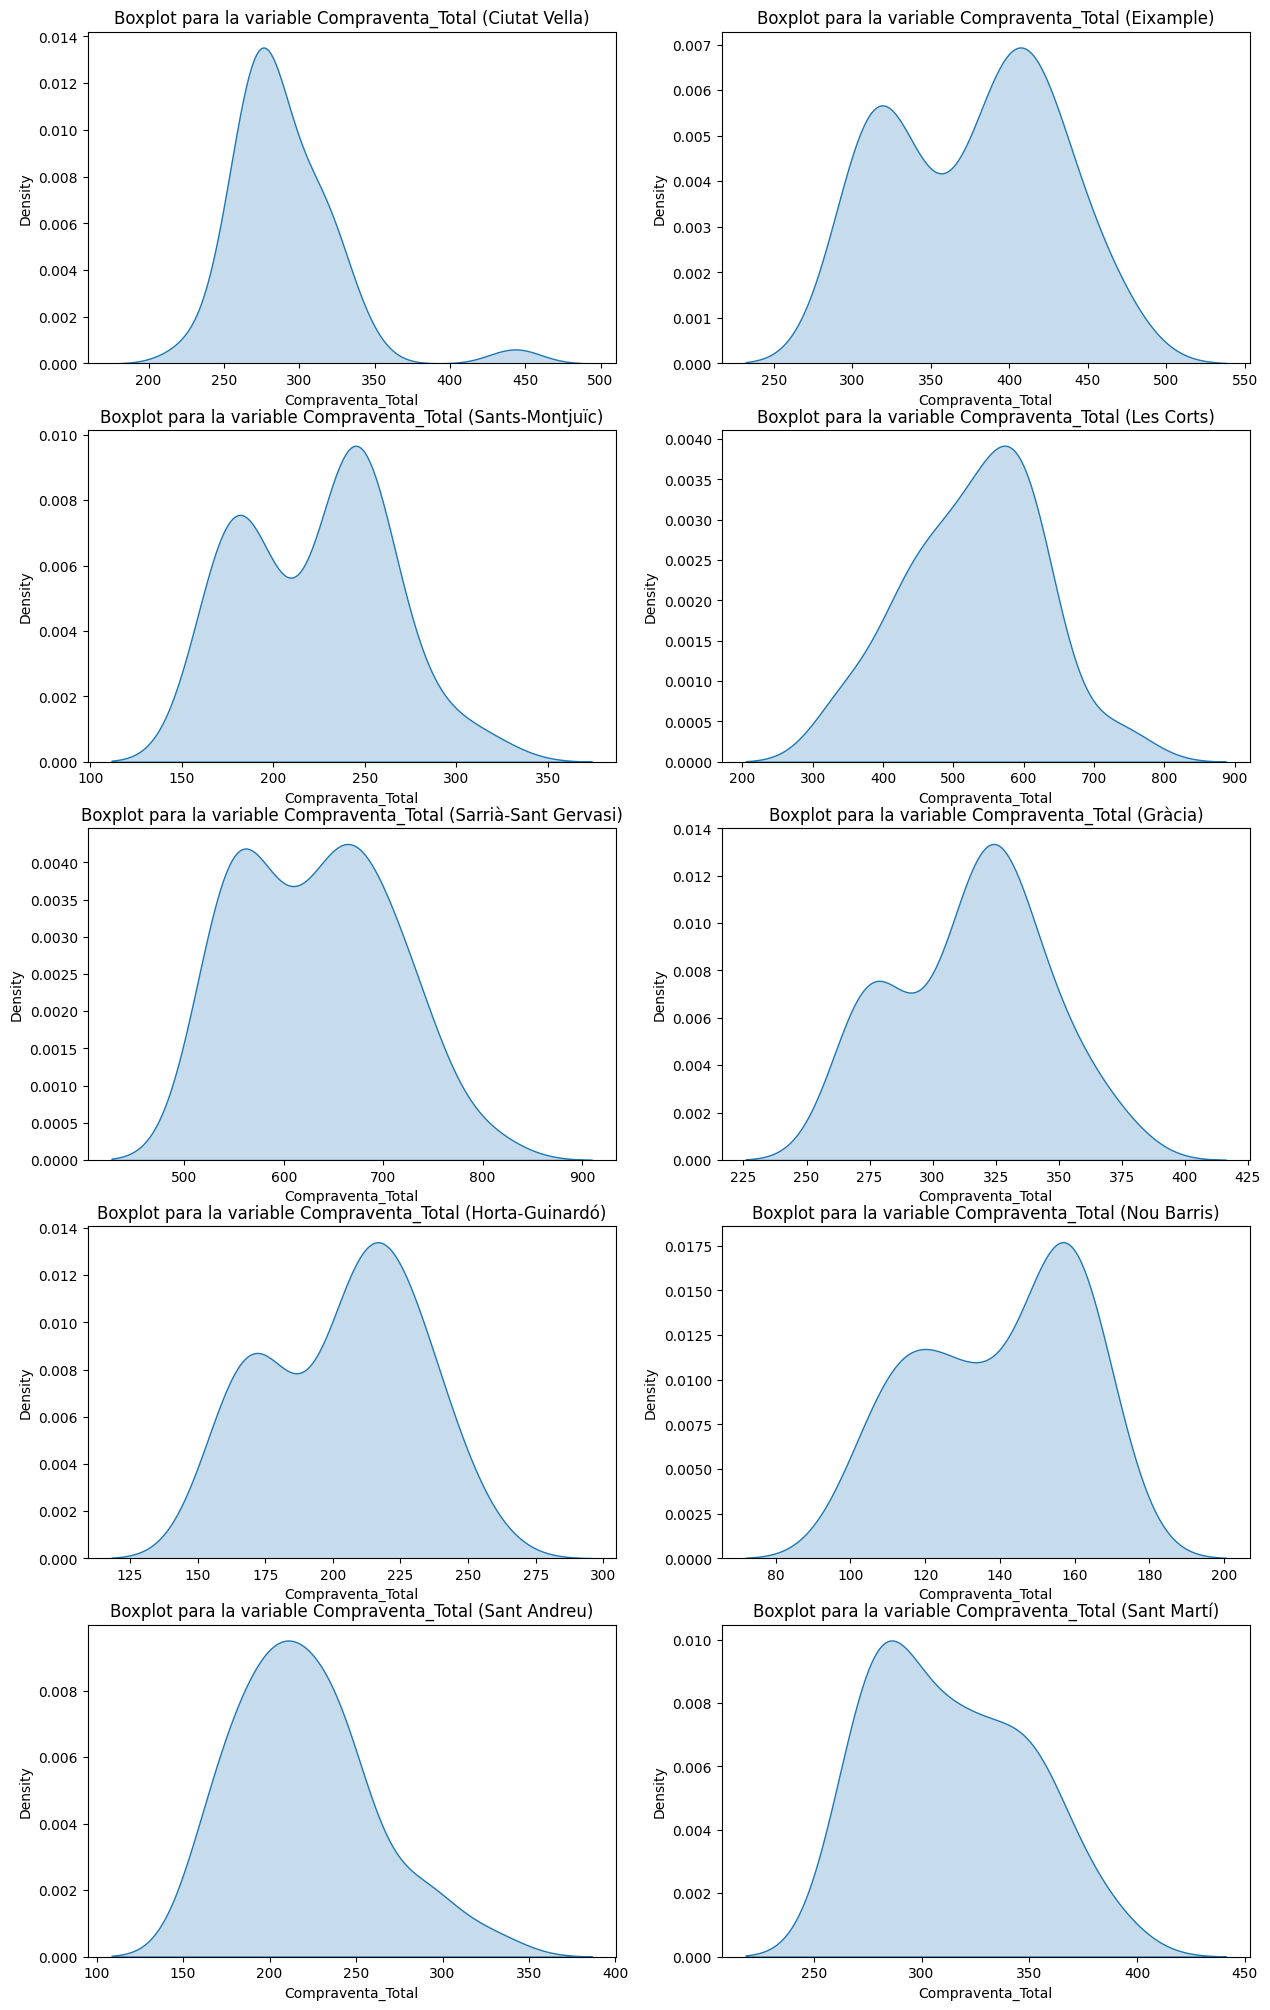

In [31]:
# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for district in distritos_ar:
    subset = datosCompraventaAgrup[datosCompraventaAgrup['Nom_Districte'] == district]  # Filtrar datos para la categoría actual
    sns.kdeplot(subset['Compraventa_Total'],ax=axs[x, y], fill=True)
    #axs[x, y].boxplot(data=subset, x='Nombre')# Graficar los valores de la variable continua
    # Configuraciones adicionales
    axs[x, y].set_title('Boxplot para la variable Compraventa_Total (' + district +')' )
    if y==0:
      y=1
    else:
      y=0
      x=x+1

plt.show()

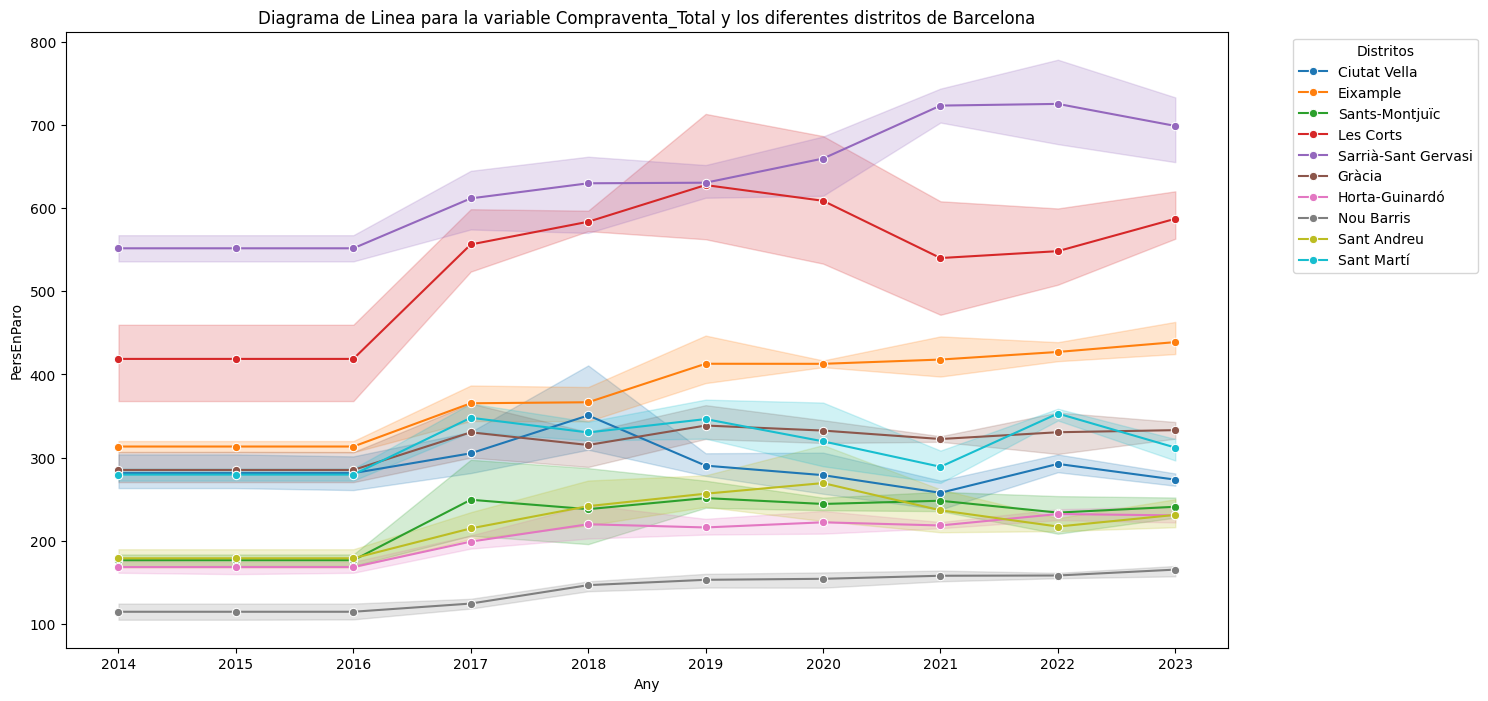

In [32]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosCompraventaAgrup, x='Any', y='Compraventa_Total', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Total y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('PersEnParo')
# Sacamos la leyenda fuera del grafico
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(any_ar)
plt.show()

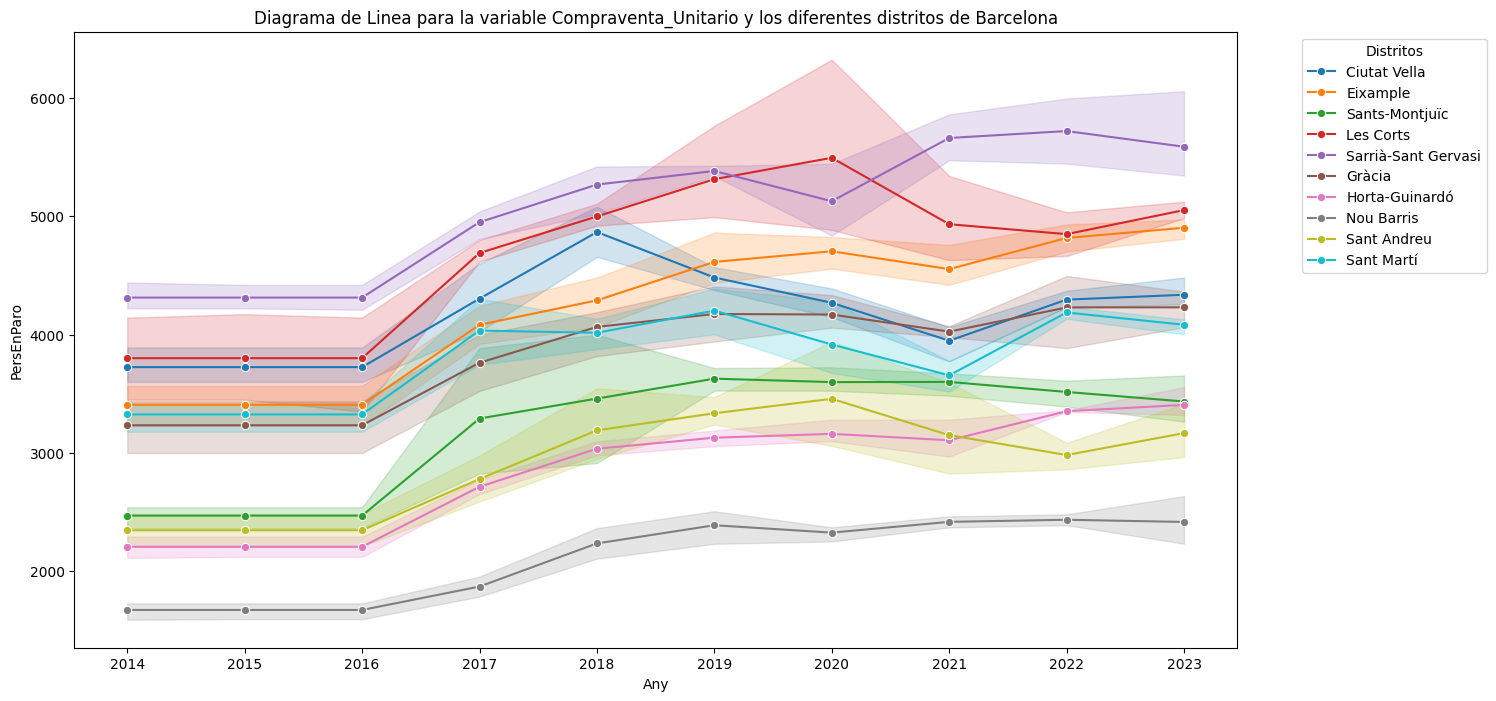

In [37]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=datosCompraventaAgrup, x='Any', y='Compraventa_Unitario', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Unitario y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('PersEnParo')
# Sacamos la leyenda fuera del grafico
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(any_ar)
plt.show()

In [33]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
print("Información del shapefile:")
barcelona_distritos.head()


Información del shapefile:


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [34]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

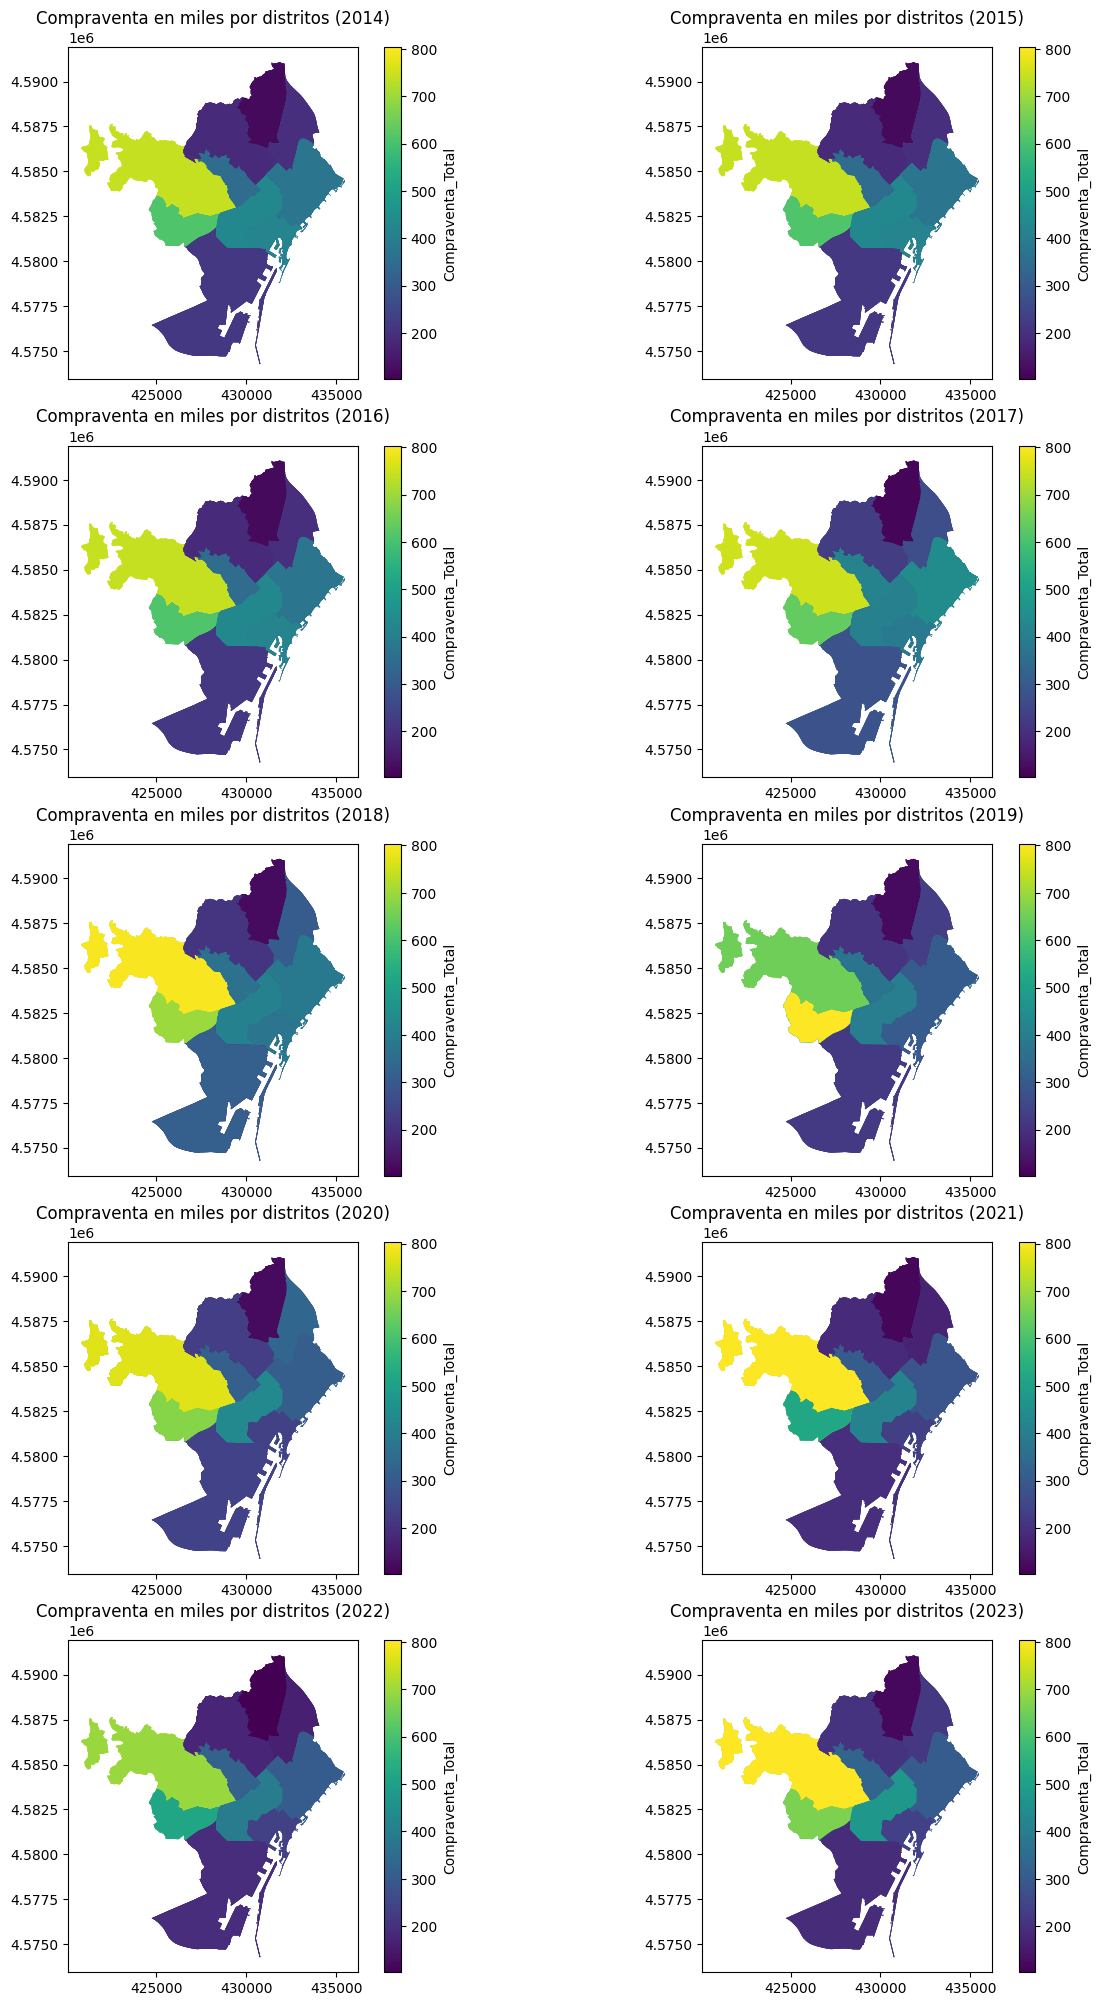

In [41]:
xmin = min(datosCompraventaAgrup['Compraventa_Total'])
xmax = max(datosCompraventaAgrup['Compraventa_Total'])

# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for any in any_ar:
  subset = datosCompraventaAgrup[datosCompraventaAgrup['Any'] == any]  # Filtrar datos para la categoría actual
  barcelona_distritos.plot(ax=axs[x, y], color='lightgrey')  # Graficar el Shapefile
  merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

  # Trazar el GeoDataFrame con un gradiente de color
  cmap = 'viridis'  # Selecciona el mapa de color
  norm = Normalize(vmin=xmin, vmax=xmax)
  sm = ScalarMappable(cmap=cmap, norm=norm)

  merged_data.plot(ax=axs[x, y], column='Compraventa_Total', cmap='viridis', legend=False)  # Graficar los datos combinados

  # Configuraciones adicionales
  axs[x, y].set_title('Compraventa en miles por distritos (' + str(any) +')' )



  # Establecer los límites de la leyenda
  sm.set_clim(xmin, xmax)

  # Crear la leyenda con un gradiente de color
  cbar = plt.colorbar(sm, ax=axs[x, y])
  cbar.set_label('Compraventa_Total')  # Establece el nombre de la variable

  if y==0:
    y=1
  else:
    y=0
    x=x+1


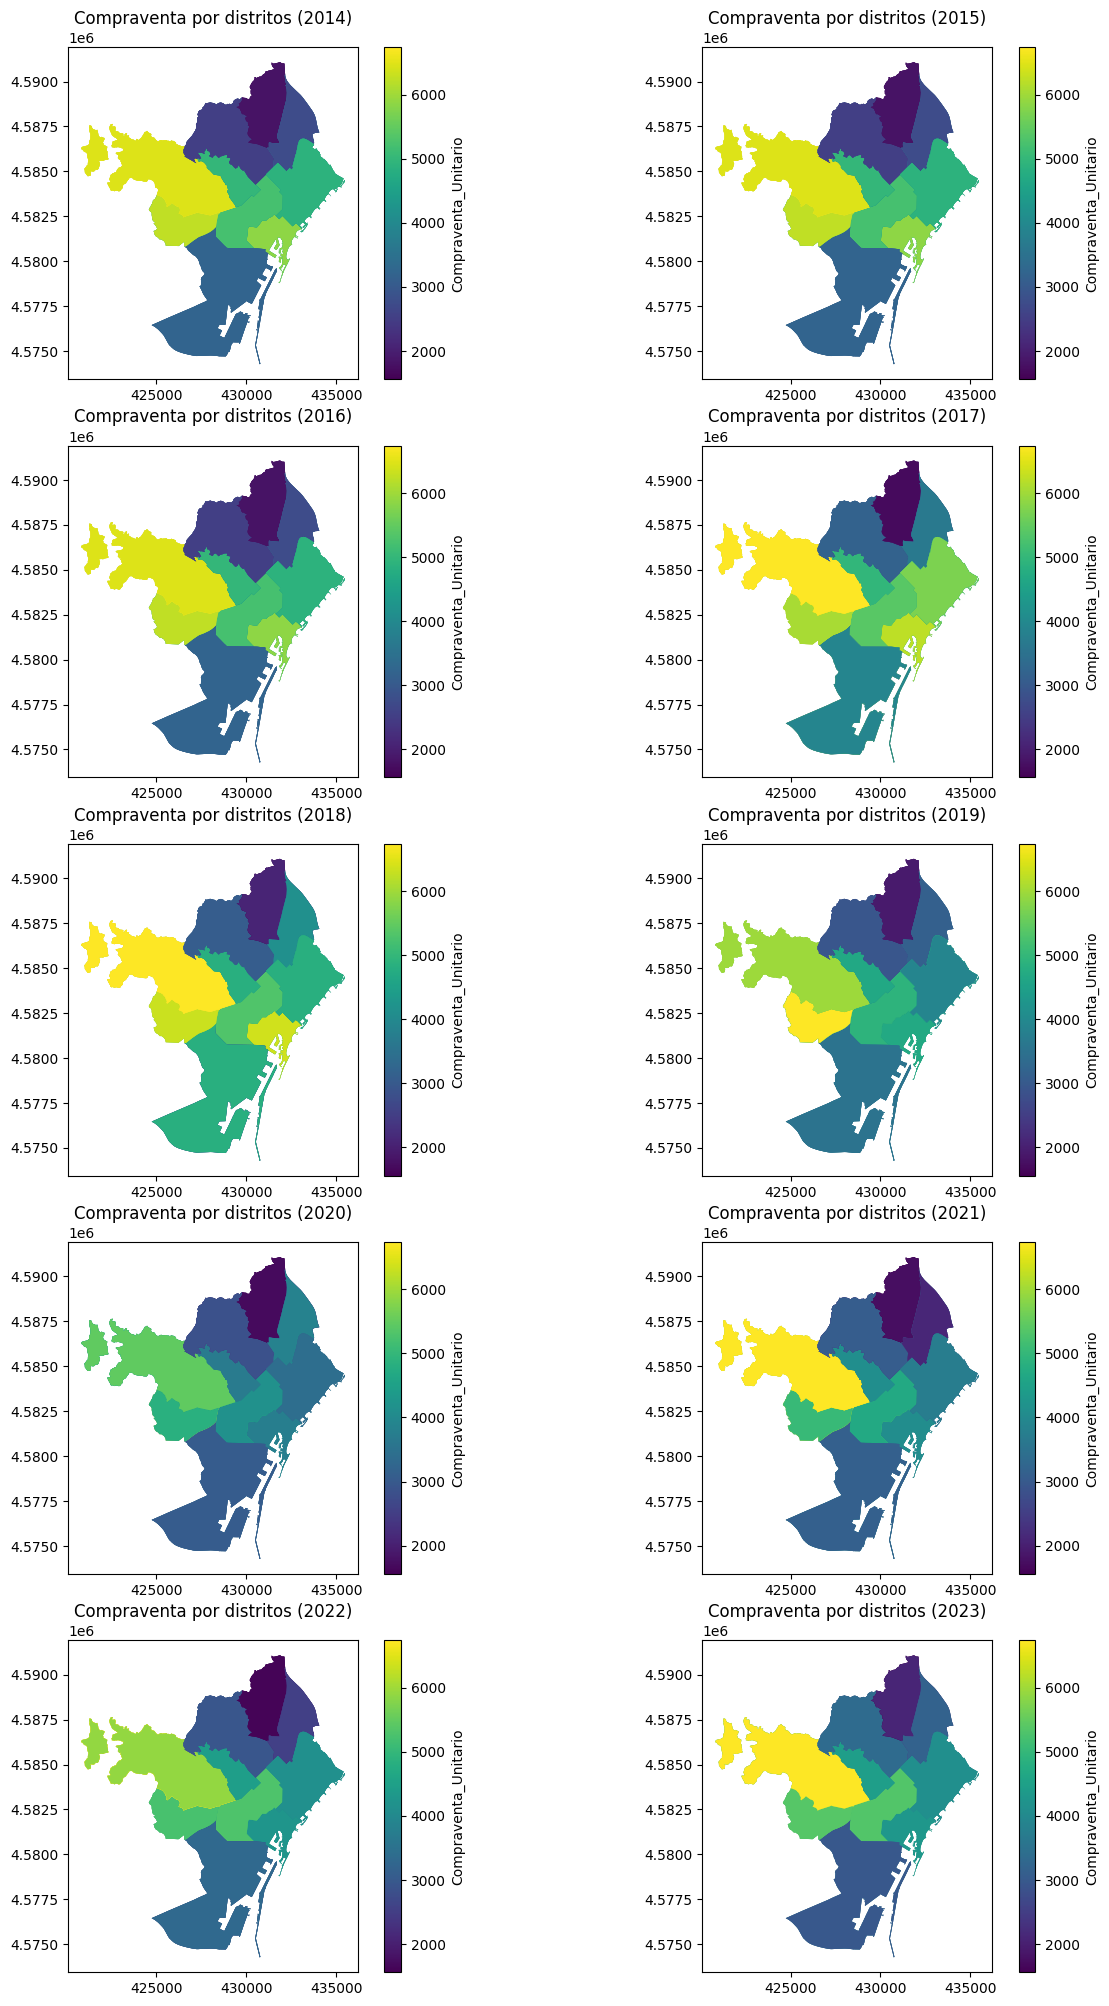

In [39]:
xmin = min(datosCompraventaAgrup['Compraventa_Unitario'])
xmax = max(datosCompraventaAgrup['Compraventa_Unitario'])

# Crear una figura y ejes
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
x=0 ;y=0

# Crear un gráfico para cada distrito
for any in any_ar:
  subset = datosCompraventaAgrup[datosCompraventaAgrup['Any'] == any]  # Filtrar datos para la categoría actual
  barcelona_distritos.plot(ax=axs[x, y], color='lightgrey')  # Graficar el Shapefile
  merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

  # Trazar el GeoDataFrame con un gradiente de color
  cmap = 'viridis'  # Selecciona el mapa de color
  norm = Normalize(vmin=xmin, vmax=xmax)
  sm = ScalarMappable(cmap=cmap, norm=norm)

  merged_data.plot(ax=axs[x, y], column='Compraventa_Unitario', cmap='viridis', legend=False)  # Graficar los datos combinados

  # Configuraciones adicionales
  axs[x, y].set_title('Compraventa por distritos (' + str(any) +')' )



  # Establecer los límites de la leyenda
  sm.set_clim(xmin, xmax)

  # Crear la leyenda con un gradiente de color
  cbar = plt.colorbar(sm, ax=axs[x, y])
  cbar.set_label('Compraventa_Unitario')  # Establece el nombre de la variable

  if y==0:
    y=1
  else:
    y=0
    x=x+1

In [40]:
# Guardar el DataFrame en un archivo CSV
datosCompraventaAgrup.to_csv('datosCompraventa.csv', index=False)